In [1]:
import pandas as pd

## 전체 확진자, 사망자, 완치자 수

In [2]:
daily_df = pd.read_csv("data/daily_report.csv")

totals_df = (
    daily_df[["Confirmed", "Deaths", "Recovered"]].sum().reset_index(name="count")
)
totals_df = totals_df.rename(columns={"index": "condition"})
totals_df

,condition,count
0,Confirmed,22678483
1,Deaths,793698
2,Recovered,14541573


## 일자별 전체 확진자, 사망자, 완치자 수

In [3]:
conditions = ['confirmed', 'deaths', 'recovered']

In [4]:
def make_global_df(conditions):
    def make_df(condition):
        df = pd.read_csv(f'new_data/timeseries_{condition}_global.csv')
        df = (
            df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
            .sum()
            .reset_index(name=f'{condition}_total')
        )
        df = df.rename(columns={'index':'date'})
        return df

    final_df = None
    for condition in conditions:
        df = make_df(condition)

        if final_df is None:
            final_df = df
        else:
            final_df = final_df.merge(df)
    
    return final_df

In [5]:
final_df = make_global_df(conditions)

In [6]:
final_df.head(2)

,date,confirmed_total,deaths_total,recovered_total
0,1/22/20,557,17,30
1,1/23/20,655,18,32


## 국가별 확진자, 사망자, 완치자

In [7]:
def make_country_df(country):
    def make_df(condition):
        df = pd.read_csv("data/time_confirmed.csv")
        df = df.loc[df["Country/Region"] == country]
        df = (
            df.drop(columns=["Province/State", "Country/Region", "Lat", "Long"])
            .sum()
            .reset_index(name=condition)
        )
        df = df.rename(columns={"index": "date"})
        return df

    final_df = None
    for condition in conditions:
        condition_df = make_df(condition)
        if final_df is None:
            final_df = condition_df
        else:
            final_df = final_df.merge(condition_df)
    return final_df

In [8]:
country_df = make_country_df('Afghanistan')

In [9]:
country_df

,date,confirmed,deaths,recovered
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
207,8/16/20,37596,37596,37596
208,8/17/20,37599,37599,37599
209,8/18/20,37599,37599,37599
210,8/19/20,37599,37599,37599


In [10]:
countries_df = daily_df[["Country_Region", "Confirmed", "Deaths", "Recovered"]]
countries_df = countries_df.groupby("Country_Region").sum().reset_index() 

In [11]:
countries_df

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,37856,1385,27681
1,Albania,7967,238,3986
2,Algeria,40258,1411,28281
3,Andorra,1024,53,875
4,Angola,2044,93,742
...,...,...,...,...
183,West Bank and Gaza,17989,120,10682
184,Western Sahara,10,1,8
185,Yemen,1899,541,1058
186,Zambia,10372,274,9126


In [12]:
import plotly.express as px
from data import countries_df


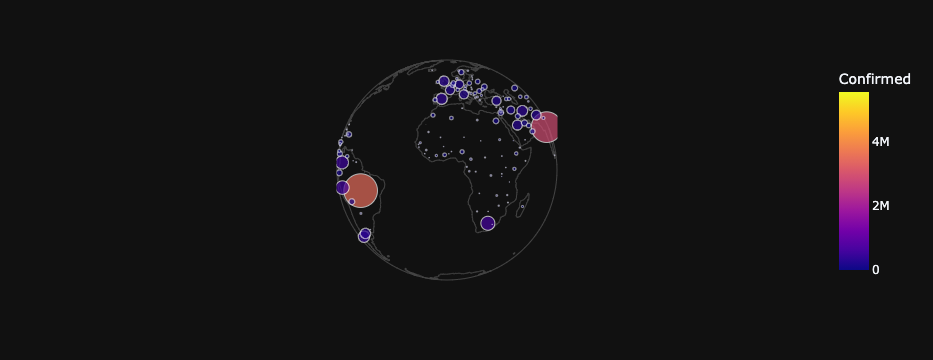

In [15]:
corona_map = px.scatter_geo(countries_df,
                     size='Confirmed',
                     size_max=30,
                     hover_name='Country_Region',
                     color='Confirmed',
                     locations='Country_Region',
                     locationmode='country names',
                     projection='orthographic',
                     hover_data={
                         'Confirmed': ':,2f',
                         'Deaths': ':,2f',
                         'Recovered': ':,2f',
                         'Country_Region': False
                     },
                     template='plotly_dark'
                    )
corona_map.show()